In [ ]:
import pandas as pd
import numpy as np

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [161]:
df = pd.read_csv('../inputs/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [162]:
print(f'DataFrame has {df.shape[0]} of Rows, and {df.shape[1]} of Columns')
print(df.columns)

DataFrame has 4600 of Rows, and 18 of Columns
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [163]:
df = df.drop(['date', 'street', 'country'], axis=1)

In [164]:
df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'num_null_values'}))
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
datatype,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,object,object
num_null_values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pct_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
# DATA CLEANING 

# set price as target values 
# fix yr_built and yr_renovated
# check city value counts and one-hot-encode
# clean state-zip and mean encode it 

In [166]:
df.yr_built = 2021 - df.yr_built

In [167]:
df.yr_renovated = 2021 - df.yr_renovated
df.yr_renovated = np.where(df.yr_renovated > 2020, 0, df.yr_renovated)

In [168]:

# remove WA from statezip zip column and convert to int64
df.statezip = df.statezip.str.replace(r'\D', '')
df.statezip = pd.to_numeric(df.statezip,errors='coerce')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [144]:
for label in top_10:
    df[label] = np.where(df['city']==label, 1, 0)
    
df[['city'] + top_10].head(10)

,city,Seattle,Renton,Bellevue,Redmond,Issaquah,Kirkland,Kent,Auburn,Sammamish,Federal Way
0,Shoreline,0,0,0,0,0,0,0,0,0,0
1,Seattle,1,0,0,0,0,0,0,0,0,0
2,Kent,0,0,0,0,0,0,1,0,0,0
3,Bellevue,0,0,1,0,0,0,0,0,0,0
4,Redmond,0,0,0,1,0,0,0,0,0,0
5,Seattle,1,0,0,0,0,0,0,0,0,0
6,Redmond,0,0,0,1,0,0,0,0,0,0
7,Maple Valley,0,0,0,0,0,0,0,0,0,0
8,North Bend,0,0,0,0,0,0,0,0,0,0
9,Seattle,1,0,0,0,0,0,0,0,0,0


In [147]:
top_10 = [x for x in df.city.value_counts().sort_values(ascending=False).head(10).index]


def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
        
        
new_df = pd.read_csv('../inputs/data.csv')
one_hot_top_x(new_df, 'city', top_10)

new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_Seattle,city_Renton,city_Bellevue,city_Redmond,city_Issaquah,city_Kirkland,city_Kent,city_Auburn,city_Sammamish,city_Federal Way
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1,0,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,1,0,0,0,0,0,0


In [148]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Renton,city_Bellevue,city_Redmond,city_Issaquah,city_Kirkland,city_Kent,city_Auburn,city_Sammamish,city_Federal Way
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1,0,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,1,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,1,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1,0,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,1,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,1,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,1,0,0,0,0,0,0,0,0,0


In [151]:
new_df.drop('city', axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_Seattle,city_Renton,city_Bellevue,city_Redmond,city_Issaquah,city_Kirkland,city_Kent,city_Auburn,city_Sammamish,city_Federal Way
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,1,0,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,1,0,0,0,0,0,0,0,0,0
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,0,1,0,0,0,0,0,0,0
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,1,0,0,0,0,0,0,0,0,0


In [154]:
new_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'city_Seattle', 'city_Renton', 'city_Bellevue',
       'city_Redmond', 'city_Issaquah', 'city_Kirkland', 'city_Kent',
       'city_Auburn', 'city_Sammamish', 'city_Federal Way'],
      dtype='object')

In [153]:
city_target_encode = new_df.groupby(['statezip'])['price'].mean().to_dict()
new_df['statezip'] =  new_df['statezip'].map(city_target_encode)

In [155]:
new_df.drop(['date', 'street', 'city', 'country'], axis=1, inplace=True)

In [156]:
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip', 'city_Seattle', 'city_Renton',
       'city_Bellevue', 'city_Redmond', 'city_Issaquah', 'city_Kirkland',
       'city_Kent', 'city_Auburn', 'city_Sammamish', 'city_Federal Way'],
      dtype='object')

In [158]:
new_df.to_csv('../inputs/train_clean_ohe.csv', index=False)

In [159]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Renton,city_Bellevue,city_Redmond,city_Issaquah,city_Kirkland,city_Kent,city_Auburn,city_Sammamish,city_Federal Way
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1,0,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,1,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,1,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1,0,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,1,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,1,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,1,0,0,0,0,0,0,0,0,0


In [170]:
df_drop_city = df.drop('city', axis=1)
df_drop_city.to_csv('../inputs/df_drop_city.csv', index=False)

In [134]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Medina                   11
Clyde Hill               11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [133]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,Shoreline,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,100,0,Seattle,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,Kent,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,Bellevue,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,Redmond,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,Seattle,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,Bellevue,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,Renton,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,Seattle,98178


In [ ]:
city_target_encode = df.groupby(['city'])['price'].mean().to_dict()
df['city'] =  df['city'].map(city_target_encode)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,100,0,579837.467282,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,439492.444648,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,847180.662995,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,667649.534781,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,579837.467282,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,847180.662995,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,579837.467282,98178


In [ ]:
city_target_encode = df.groupby(['statezip'])['price'].mean().to_dict()
df['statezip'] =  df['statezip'].map(city_target_encode)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,374433.232975
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,100,0,579837.467282,914441.496599
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,439492.444648,320243.968571
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,847180.662995,602963.100000
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,667649.534781,637555.719367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,579837.467282,374433.232975
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,847180.662995,639103.418803
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,499455.770108
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,579837.467282,263912.457483


<AxesSubplot:>

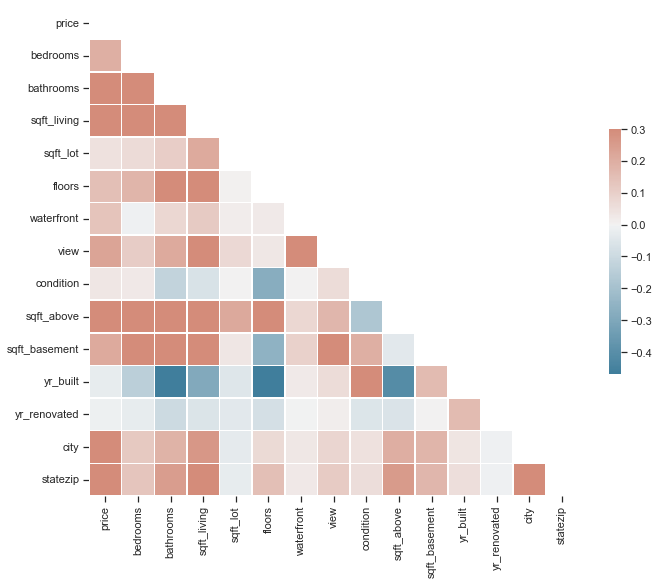

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [ ]:
df.view.value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,50.213696,10.775435,5.519630e+05,5.519630e+05
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,18.853281,1.848775e+05,2.355136e+05
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,7.000000,0.000000,2.072880e+05,2.235473e+05
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,24.000000,0.000000,4.203924e+05,3.744332e+05
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,45.000000,0.000000,5.798375e+05,5.363053e+05
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,70.000000,18.000000,6.095650e+05,6.375557e+05
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,121.000000,109.000000,2.046559e+06,2.046559e+06


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


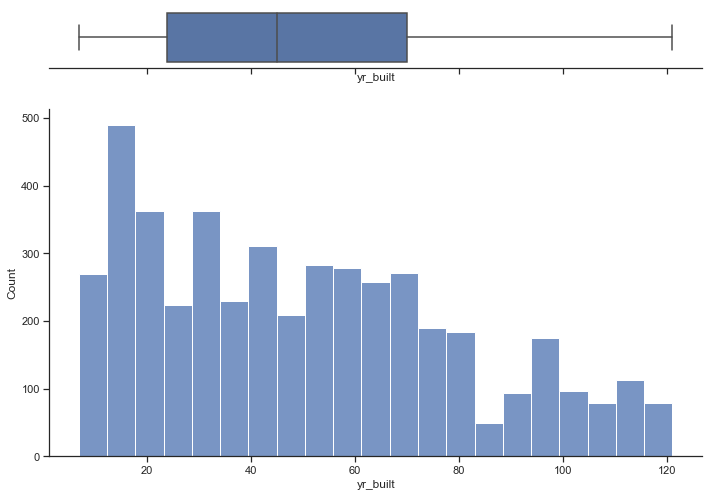

In [ ]:
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(11.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.yr_built, ax=ax_box)
sns.histplot(df.yr_built, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


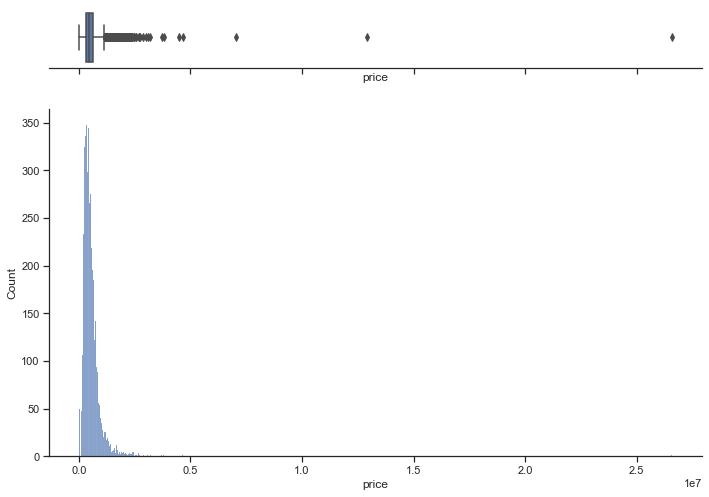

In [ ]:
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(11.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.price, ax=ax_box)
sns.histplot(df.price, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [92]:
outliers = []
def detect_outliers(col):
    mu = np.mean(col)
    std = np.std(col)
    
    for i in col:
        z_score = (i - mu)/ std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
    

In [97]:

outlier_pt=detect_outliers(df.price)
len(outlier_pt)# 11 outliers

171

In [98]:
df = df[~df.price.isin(outlier_pt)]
print(df.shape)

(4418, 15)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


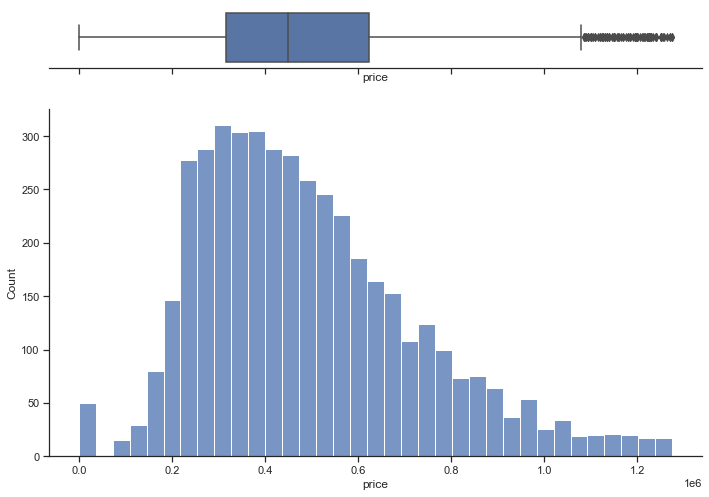

In [99]:
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(11.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.price, ax=ax_box)
sns.histplot(df.price, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [101]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
count,4.418000e+03,4418.000000,4418.000000,4418.000000,4.418000e+03,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4.418000e+03,4.418000e+03
mean,4.916154e+05,3.367587,2.112268,2058.847669,1.466453e+04,1.498529,0.004753,0.190358,3.446582,1767.511091,291.336578,50.081711,10.760299,5.414031e+05,5.341515e+05
std,2.344873e+05,0.887750,0.731278,842.517919,3.594730e+04,0.536054,0.068788,0.684064,0.672210,786.071212,431.757810,29.527559,18.841180,1.654465e+05,2.117387e+05
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,7.000000,0.000000,2.072880e+05,2.235473e+05
25%,3.161250e+05,3.000000,1.750000,1440.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,24.000000,0.000000,4.203924e+05,3.605350e+05
50%,4.500000e+05,3.000000,2.250000,1940.000000,7.612000e+03,1.500000,0.000000,0.000000,3.000000,1550.000000,0.000000,45.000000,0.000000,5.798375e+05,5.226128e+05
75%,6.225000e+05,4.000000,2.500000,2540.000000,1.077825e+04,2.000000,0.000000,0.000000,4.000000,2220.000000,580.000000,70.000000,18.000000,5.961637e+05,6.258700e+05
max,1.275000e+06,9.000000,6.250000,8020.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,2330.000000,121.000000,109.000000,2.046559e+06,2.046559e+06


In [103]:
df.to_csv('../inputs/train_clean.csv', index=False)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constraine

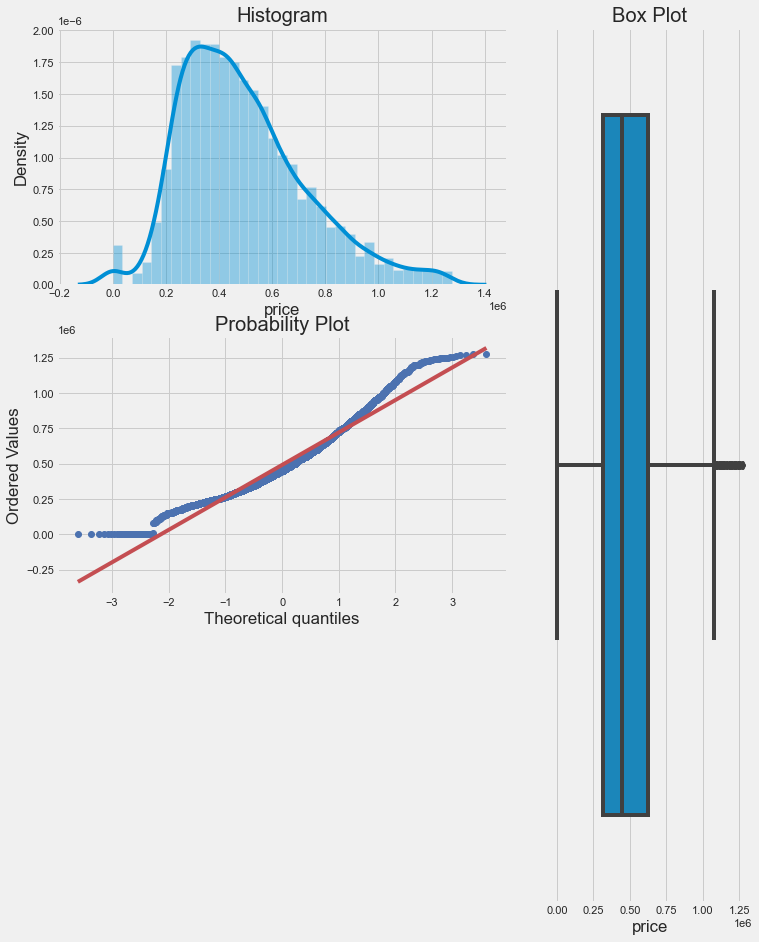

In [123]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec



def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,15))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 )
    
plotting_3_chart(df, 'price')

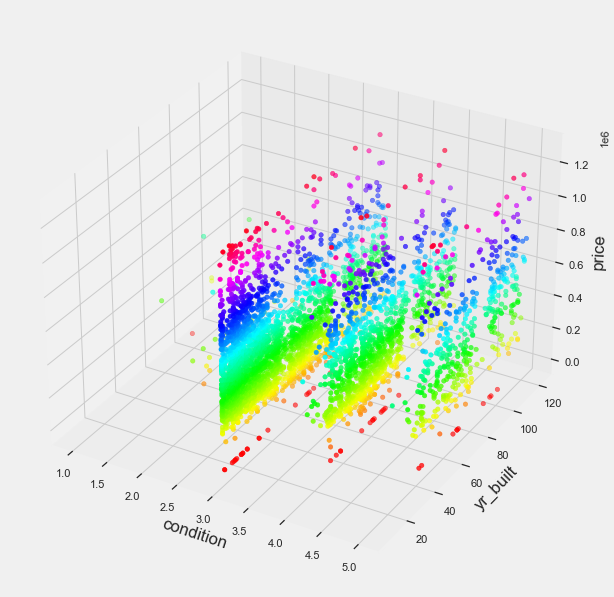

In [110]:
#Thanks to https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = df['price']
x_points = df['condition']
y_points = df['yr_built']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('condition')
ax.set_ylabel('yr_built')
ax.set_zlabel('price')

plt.show()

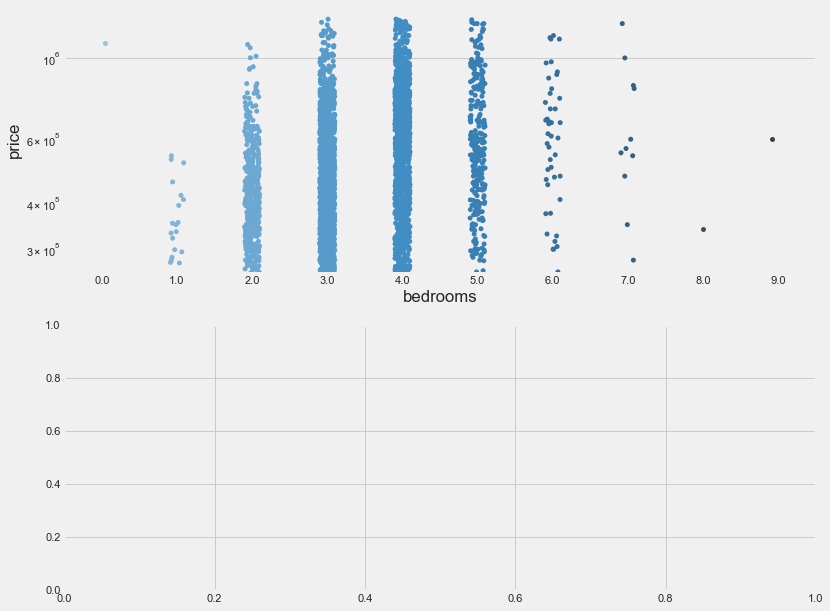

In [116]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = df, ax = ax1, jitter=True, palette="Blues_d")
plt.show()